In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets,tree,metrics

In [2]:
digits = datasets.load_digits()

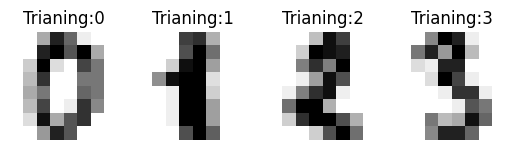

In [5]:
_, axes =plt.subplots(1,4)
images_and_labels = list(zip(digits.images,digits.target))
for ax,(image,label) in zip(axes,images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Trianing:%i'% label)
plt.show()

In [6]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [7]:
classifier = tree.DecisionTreeClassifier(criterion="entropy",random_state=33)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.2,shuffle=False)


In [9]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

In [10]:
predicted = classifier.predict(x_test)

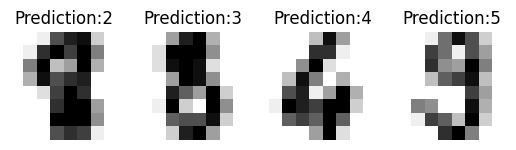

In [11]:
_, axes =plt.subplots(1,4)
images_and_predictions = list(zip(digits.images[n_samples//2:],predicted))
for ax,(image,prediction) in zip(axes,images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Prediction:%i'% prediction)
plt.show()

Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=33):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.72      0.64      0.68        36
           2       0.76      0.74      0.75        35
           3       0.69      0.59      0.64        37
           4       0.86      0.84      0.85        37
           5       0.80      0.95      0.86        37
           6       0.97      0.95      0.96        37
           7       0.78      0.86      0.82        36
           8       0.79      0.82      0.81        33
           9       0.72      0.70      0.71        37

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.79       360
weighted avg       0.80      0.80      0.79       360




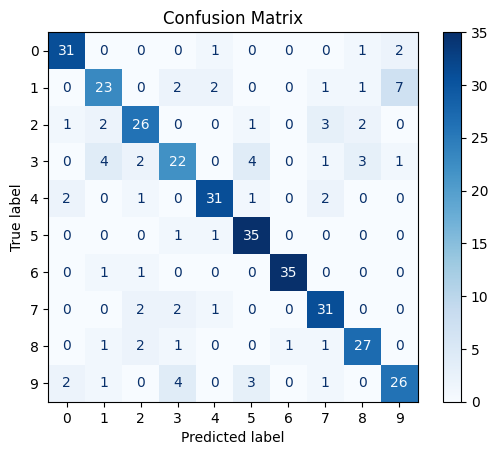

Confusion matrix:
[[31  0  0  0  1  0  0  0  1  2]
 [ 0 23  0  2  2  0  0  1  1  7]
 [ 1  2 26  0  0  1  0  3  2  0]
 [ 0  4  2 22  0  4  0  1  3  1]
 [ 2  0  1  0 31  1  0  2  0  0]
 [ 0  0  0  1  1 35  0  0  0  0]
 [ 0  1  1  0  0  0 35  0  0  0]
 [ 0  0  2  2  1  0  0 31  0  0]
 [ 0  1  2  1  0  0  1  1 27  0]
 [ 2  1  0  4  0  3  0  1  0 26]]


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Classification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test, predicted)))

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, predicted)

# Tạo và hiển thị ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

print("Confusion matrix:\n%s" % cm)


In [23]:
from PIL import Image,ImageOps
import numpy as np

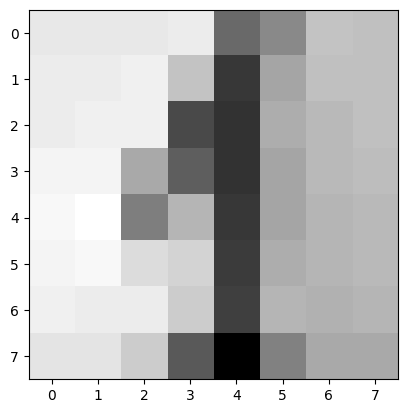

In [31]:
img = Image.open('sample_1.jpg').convert("L").resize((8,8))
img = ImageOps.invert(img)
im2arr = np.array(img)
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')

In [32]:
img1d = im2arr.reshape([1,64])
img1d[img1d > 109] = 155
img1d[img1d < 110] = 0
img1d

array([[  0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0,   0, 155,
          0,   0,   0,   0,   0,   0, 155, 155,   0,   0,   0,   0,   0,
          0, 155, 155,   0,   0,   0,   0,   0,   0,   0, 155,   0,   0,
          0,   0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0,   0,
        155,   0,   0,   0,   0,   0,   0, 155, 155,   0,   0,   0]],
      dtype=uint8)

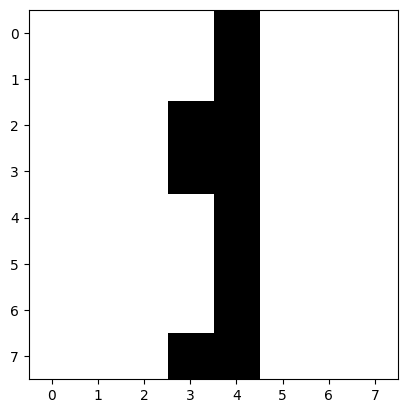

In [33]:
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')

In [34]:
y_pred = classifier.predict(img1d)
print(y_pred)

[1]


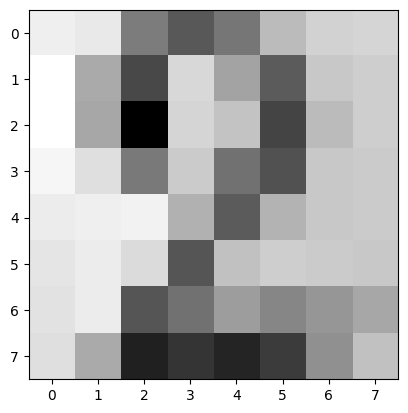

In [36]:
img = Image.open('Data\sample_2.jpg').convert("L").resize((8,8))
img = ImageOps.invert(img)
im2arr = np.array(img)
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')

In [37]:
img1d = im2arr.reshape([1,64])
img1d[img1d > 109] = 155
img1d[img1d < 110] = 0
img1d

array([[  0,   0, 155, 155, 155,   0,   0,   0,   0,   0, 155,   0,   0,
        155,   0,   0,   0,   0, 155,   0,   0, 155,   0,   0,   0,   0,
        155,   0, 155, 155,   0,   0,   0,   0,   0,   0, 155,   0,   0,
          0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0, 155, 155,
          0, 155,   0,   0,   0,   0, 155, 155, 155, 155,   0,   0]],
      dtype=uint8)

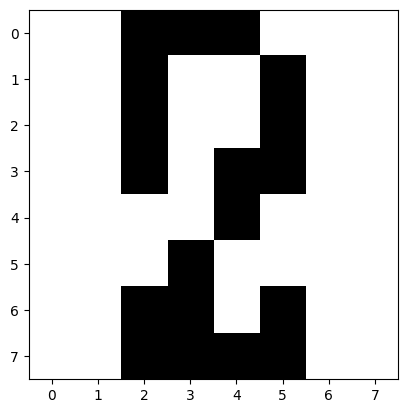

In [38]:
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')


In [39]:
y_pred = classifier.predict(img1d)
print(y_pred)

[2]


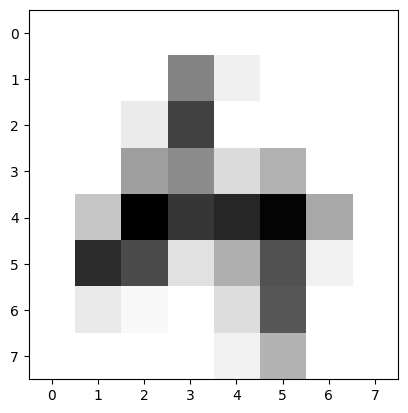

In [70]:
img = Image.open('Untitled.png').convert("L").resize((8,8))
img = ImageOps.invert(img)
im2arr = np.array(img)
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')

In [71]:
img1d = im2arr.reshape([1,64])
img1d[img1d > 109] = 155
img1d[img1d < 110] = 0
img1d

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 155, 155, 155, 155,   0,
          0,   0, 155, 155,   0,   0, 155,   0,   0,   0,   0,   0,   0,
          0, 155,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=uint8)

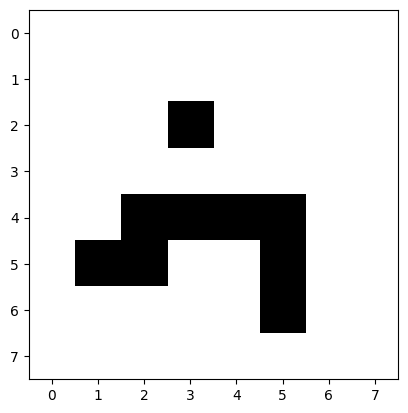

In [72]:
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')


In [73]:
y_pred = classifier.predict(img1d)
print(y_pred)

[4]
